In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from numpy import corrcoef
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('kidney_disease.csv', index_col = 'id')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna()

In [4]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,0


In [6]:
x = df.drop( ["classification"], axis = 1)
y = df["classification"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [8]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(x, y)
selector.n_features_

7

In [9]:
selector.get_feature_names_out(input_features=None)

array(['sg', 'al', 'rbc', 'pc', 'hemo', 'htn', 'ane'], dtype=object)

In [10]:
pearsoncorr = x_train.corr(method='pearson')
pearsoncorr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.123170,-0.219645,0.223683,0.166430,-0.123351,-0.149749,0.073106,0.024544,0.282648,...,-0.205555,-0.222597,-0.129921,-0.247385,0.351334,0.272981,0.242986,0.147424,0.190745,0.083775
bp,0.123170,1.000000,-0.200616,0.326779,0.215117,-0.352917,-0.179656,0.124637,0.229726,0.175711,...,-0.231020,-0.309769,-0.037194,-0.209913,0.324420,0.231514,0.195449,0.076121,0.183028,0.264904
sg,-0.219645,-0.200616,1.000000,-0.743512,-0.427929,0.535130,0.625786,-0.411971,-0.518875,-0.548233,...,0.657644,0.647353,0.327052,0.605332,-0.651339,-0.577694,-0.365342,-0.504336,-0.566947,-0.420803
al,0.223683,0.326779,-0.743512,1.000000,0.472997,-0.515011,-0.716598,0.476971,0.518140,0.473465,...,-0.759242,-0.751601,-0.312649,-0.625375,0.791813,0.648662,0.304021,0.579265,0.629733,0.502422
su,0.166430,0.215117,-0.427929,0.472997,1.000000,-0.230815,-0.290905,0.054287,0.362139,0.726665,...,-0.332535,-0.351877,-0.079326,-0.348535,0.542521,0.558358,0.353006,0.185689,0.380767,0.077442
rbc,-0.123351,-0.352917,0.535130,-0.515011,-0.230815,1.000000,0.515272,-0.152571,-0.264443,-0.480330,...,0.507686,0.478505,0.264248,0.404135,-0.439838,-0.533002,-0.291706,-0.375035,-0.320245,-0.304267
pc,-0.149749,-0.179656,0.625786,-0.716598,-0.290905,0.515272,1.000000,-0.561034,-0.440670,-0.393171,...,0.721048,0.706282,0.172198,0.628193,-0.676905,-0.635764,-0.394652,-0.476483,-0.569138,-0.524314
pcc,0.073106,0.124637,-0.411971,0.476971,0.054287,-0.152571,-0.561034,1.000000,0.374591,0.207025,...,-0.481434,-0.475055,-0.212312,-0.441252,0.419110,0.262613,0.284775,0.345386,0.269898,0.429269
ba,0.024544,0.229726,-0.518875,0.518140,0.362139,-0.264443,-0.440670,0.374591,1.000000,0.314766,...,-0.409866,-0.371970,-0.153334,-0.301203,0.305776,0.372104,0.306917,0.088362,0.294174,0.023394
bgr,0.282648,0.175711,-0.548233,0.473465,0.726665,-0.480330,-0.393171,0.207025,0.314766,1.000000,...,-0.393134,-0.422190,-0.210092,-0.419163,0.588648,0.648491,0.404828,0.303951,0.330979,0.097577


<AxesSubplot:>

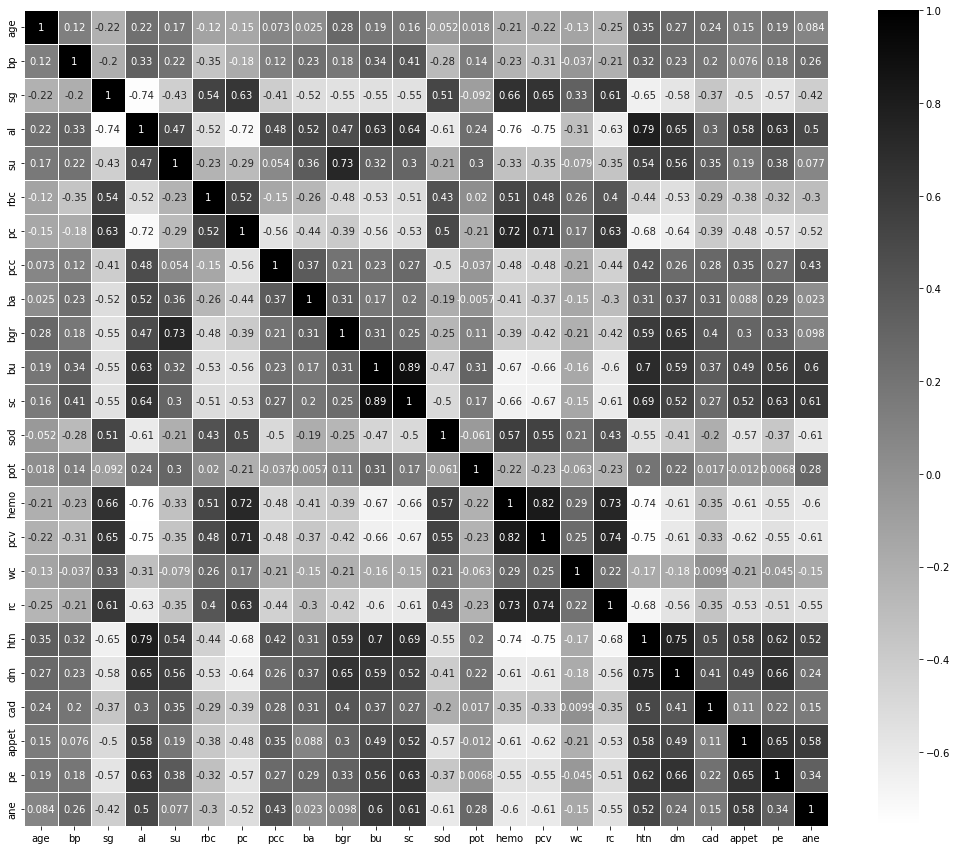

In [11]:
plt.figure(figsize = (18,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)

In [12]:
#Selecting highly correlated features using Pearsons Correlation
def correlation(threshold):
    col_corr = set()
    corr_matrix = pearsoncorr
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
            #if (corr_matrix.iloc[i, j] > threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [13]:
#select features with 70% threshold
corr_features = correlation(0.7)
corr_features

{'bgr', 'dm', 'hemo', 'htn', 'pcv', 'rc', 'sc'}

In [14]:
#Correlation matrix and upper triangular matrix
cm = pearsoncorr.abs()
ut = cm.where(np.triu(np.ones(cm.shape),k=1).astype(bool))
todrop = {column for column in ut.columns if any(ut[column] > 0.75)}
todrop

{'dm', 'hemo', 'htn', 'pcv', 'sc'}

In [15]:
#Features that appear through both algorithms
todrop = {i for i in todrop.intersection(corr_features)}
todrop

{'dm', 'hemo', 'htn', 'pcv', 'sc'}

In [16]:
##TESTING ONLY
#https://www.kdnuggets.com/2020/08/getting-started-feature-selection.html
corr = df.corr()["classification"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(corr)

# random threshold for features to keep
relevant_features = abs_corr[abs_corr>0.7]
pcr = set(relevant_features.index)
pcr

{'al', 'dm', 'hemo', 'htn', 'pc', 'pcv', 'rc', 'sc', 'sg'}

In [17]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=x, y=y, K=7)
selected_features = set(selected_features)
selected_features

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 124.27it/s]


{'al', 'dm', 'hemo', 'htn', 'pc', 'pcv', 'sg'}

In [18]:
#https://github.com/smazzanti/mrmr
#https://elliot-weissberg.medium.com/another-feature-selection-algorithm-mrmr-3827b6b19e33

Weight for the classification accuracy [0-1]: .75
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9140625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9140625, Number of Features: 6
Particle 2 - Fitness: 0.9140625, Number of Features: 6
Particle 3 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 4 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 5 - Fitness: 0.8776041666666666, Number of Features: 5
Particle 6 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 7 - Fitness: 0.859375, Number of Features: 9
Particle 8 - Fitness: 0.8567708333333334, Number of Features: 7
Particle 9 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 10 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 11 - Fitness: 0.8359375, Number of Features: 9
Particle 12 - Fitness: 0.8


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9140625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9140625, Number of Features: 6
Particle 2 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 5 - Fitness: 0.875, Number of Features: 12
Particle 6 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 7 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 8 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 9 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 10 - Fitness: 0.8645833333333334, Number of Features: 4
Particle 11 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 12 - Fitness: 0.859375, Number of Features: 9
Particle 13 - Fitness: 0.8515625, Number of Features: 12
Particle 14 - Fitness: 0.8515625, Number of Features: 12
Part


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.9166666666666666, Number of Features: 8
Particle 3 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 4 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 5 - Fitness: 0.8828125, Number of Features: 9
Particle 6 - Fitness: 0.8828125, Number of Features: 9
Particle 7 - Fitness: 0.8828125, Number of Features: 9
Particle 8 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 9 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 10 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 11 - Fitness: 0.8671875, Number of Features: 6
Particle 12 - Fitness: 0.859375, Number of Features: 9
Particle 13 - Fitness: 0.859375, Number of Features: 9
Particle 14 - Fitness: 0.859375, Number of Features: 9
Particl


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9270833333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9270833333333334, Number of Features: 7
Particle 2 - Fitness: 0.9140625, Number of Features: 6
Particle 3 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 4 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 5 - Fitness: 0.8828125, Number of Features: 9
Particle 6 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 7 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 8 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 9 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 10 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 11 - Fitness: 0.8515625, Number of Features: 12
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 14 - Fitness: 0.8333


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 6 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 7 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 8 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 9 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 10 - Fitness: 0.859375, Number of Features: 9
Particle 11 - Fitness: 0.8515625, Number of Features: 12
Particle 12 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 13 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 14 - Fitness: 0.828125, Number


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.921875
Number of Features: 3
----------------------------------------

Particle 1 - Fitness: 0.921875, Number of Features: 3
Particle 2 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 3 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 4 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 5 - Fitness: 0.890625, Number of Features: 6
Particle 6 - Fitness: 0.8828125, Number of Features: 9
Particle 7 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 8 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 9 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 10 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 11 - Fitness: 0.859375, Number of Features: 9
Particle 12 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 13 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 14 - Fitness: 0.8411458333333334, Number of


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 7 - Fitness: 0.8515625, Number of Features: 12
Particle 8 - Fitness: 0.8515625, Number of Features: 12
Particle 9 - Fitness: 0.8515625, Number of Features: 12
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 12 - Fitness: 0.828125, Number of Features: 12
Particle 13 - Fitness: 0.8203125, Number of Features: 15
Particle 14 - Fitness: 0.8098958333333334, Number of 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 5 - Fitness: 0.8802083333333334, Number of Features: 7
Particle 6 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 7 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 8 - Fitness: 0.859375, Number of Features: 9
Particle 9 - Fitness: 0.859375, Number of Features: 9
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 12 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 13 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 14 - Fitness: 0.82291


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9140625
Number of Features: 6
----------------------------------------

Particle 1 - Fitness: 0.9140625, Number of Features: 6
Particle 2 - Fitness: 0.90625, Number of Features: 9
Particle 3 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 4 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 5 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 6 - Fitness: 0.8515625, Number of Features: 12
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 9 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 10 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 11 - Fitness: 0.8333333333333334, Number of Features: 7
Particle 12 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 13 - Fitness: 0.828125, Number of Features: 12
Particle 14 - Fitness: 0.8255208333333334, Num


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9010416666666666
Number of Features: 5
----------------------------------------

Particle 1 - Fitness: 0.9010416666666666, Number of Features: 5
Particle 2 - Fitness: 0.8671875, Number of Features: 6
Particle 3 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 4 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 5 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 6 - Fitness: 0.8515625, Number of Features: 12
Particle 7 - Fitness: 0.8463541666666666, Number of Features: 8
Particle 8 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.8


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8828125
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.8828125, Number of Features: 9
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.875, Number of Features: 12
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 6 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 7 - Fitness: 0.8515625, Number of Features: 12
Particle 8 - Fitness: 0.8515625, Number of Features: 12
Particle 9 - Fitness: 0.8333333333333334, Number of Features: 16
Particle 10 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 11 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 12 - Fitness: 0.828125, Number of Features: 12
Particle 13 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 14 - Fitness: 0.8229166666666666, Number of Features: 8



Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.890625, Number of Features: 6
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 6 - Fitness: 0.8515625, Number of Features: 12
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 11 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 12 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 13 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 14 - Fitness: 0.8046875, Number of Feat


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9244791666666666
Number of Features: 5
----------------------------------------

Particle 1 - Fitness: 0.9244791666666666, Number of Features: 5
Particle 2 - Fitness: 0.9140625, Number of Features: 6
Particle 3 - Fitness: 0.875, Number of Features: 12
Particle 4 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 8 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.828125, Number of Features: 12
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.8098958333333334, Numbe


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8723958333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 2 - Fitness: 0.8515625, Number of Features: 12
Particle 3 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 4 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 7 - Fitness: 0.828125, Number of Features: 12
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.8125, Number of Features: 9
Particle 10 - Fitness: 0.8098958333333334, Number of Features: 16
Particle 11 - Fitness: 0.8072916666666666, Number of Features: 14
Particle 12 - Fitness: 0.7994791666666666, Number of Features: 17
Particle 13 - Fitness: 0.7890625, Number of Features: 18
Particle 14 - Fitness: 0.7864583333333334, Nu


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8828125
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.8828125, Number of Features: 9
Particle 2 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 3 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 4 - Fitness: 0.8515625, Number of Features: 12
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 8 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 13 - Fitness: 0.8046875, Number of Features: 12
Particle 14 - Fitness: 0.8046875, Number 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.875
Number of Features: 12
----------------------------------------

Particle 1 - Fitness: 0.875, Number of Features: 12
Particle 2 - Fitness: 0.875, Number of Features: 12
Particle 3 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 4 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 5 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 6 - Fitness: 0.84375, Number of Features: 15
Particle 7 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 8 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 11 - Fitness: 0.8203125, Number of Features: 15
Particle 12 - Fitness: 0.8203125, Number of Features: 15
Particle 13 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 14 - Fitness: 0.8177083333333334, Number of Features: 13
Partic


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8723958333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 2 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 3 - Fitness: 0.8515625, Number of Features: 12
Particle 4 - Fitness: 0.8515625, Number of Features: 12
Particle 5 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.84375, Number of Features: 15
Particle 8 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 9 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 10 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 11 - Fitness: 0.828125, Number of Features: 12
Particle 12 - Fitness: 0.828125, Number of Features: 12
Particle 13 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 14 - Fitness: 0.8255208333333334, 


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8958333333333334
Number of Features: 10
----------------------------------------

Particle 1 - Fitness: 0.8958333333333334, Number of Features: 10
Particle 2 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 5 - Fitness: 0.8671875, Number of Features: 6
Particle 6 - Fitness: 0.8645833333333334, Number of Features: 13
Particle 7 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 8 - Fitness: 0.859375, Number of Features: 9
Particle 9 - Fitness: 0.8515625, Number of Features: 12
Particle 10 - Fitness: 0.84375, Number of Features: 15
Particle 11 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 14 - Fitness: 0.8385416666666666, Nu


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 3 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 4 - Fitness: 0.8854166666666666, Number of Features: 11
Particle 5 - Fitness: 0.8828125, Number of Features: 9
Particle 6 - Fitness: 0.875, Number of Features: 12
Particle 7 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 8 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 9 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 10 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 11 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 12 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 13 - Fitness: 0.8333333333333334, Number of Features: 16
Particle 14 - Fitness


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 3 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 4 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 5 - Fitness: 0.8515625, Number of Features: 12
Particle 6 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 7 - Fitness: 0.8489583333333334, Number of Features: 10
Particle 8 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 9 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 10 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 11 - Fitness: 0.828125, Number of Features: 12
Particle 12 - Fitness: 0.828125, Number of Features: 12
Particle 13 - Fitness: 0.8255208333333334, Number of Features: 10
Particle 14 - Fitness: 0.


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.90625
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.90625, Number of Features: 9
Particle 2 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 3 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 4 - Fitness: 0.8619791666666666, Number of Features: 11
Particle 5 - Fitness: 0.859375, Number of Features: 9
Particle 6 - Fitness: 0.8515625, Number of Features: 12
Particle 7 - Fitness: 0.8515625, Number of Features: 12
Particle 8 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 9 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 10 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 11 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 12 - Fitness: 0.8203125, Number of Features: 15
Particle 13 - Fitness: 0.8151041666666666, Number of Features: 11
Particle 14 - Fitness: 0.8151041666666666, Number of Feat


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.9036458333333334
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.9036458333333334, Number of Features: 7
Particle 2 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 3 - Fitness: 0.8515625, Number of Features: 12
Particle 4 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 5 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 6 - Fitness: 0.8385416666666666, Number of Features: 11
Particle 7 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 8 - Fitness: 0.828125, Number of Features: 12
Particle 9 - Fitness: 0.828125, Number of Features: 12
Particle 10 - Fitness: 0.8203125, Number of Features: 15
Particle 11 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 12 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 13 - Fitness: 0.8177083333333334, Number of Features: 13
Particle 14 - Fitness: 0.8151041666


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.8932291666666666
Number of Features: 8
----------------------------------------

Particle 1 - Fitness: 0.8932291666666666, Number of Features: 8
Particle 2 - Fitness: 0.8828125, Number of Features: 9
Particle 3 - Fitness: 0.8828125, Number of Features: 9
Particle 4 - Fitness: 0.8828125, Number of Features: 9
Particle 5 - Fitness: 0.875, Number of Features: 12
Particle 6 - Fitness: 0.8723958333333334, Number of Features: 10
Particle 7 - Fitness: 0.8697916666666666, Number of Features: 8
Particle 8 - Fitness: 0.8541666666666666, Number of Features: 14
Particle 9 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 10 - Fitness: 0.8411458333333334, Number of Features: 13
Particle 11 - Fitness: 0.8333333333333334, Number of Features: 7
Particle 12 - Fitness: 0.8307291666666666, Number of Features: 14
Particle 13 - Fitness: 0.828125, Number of Features: 12
Particle 14 - Fitness: 0.8255208333333334, Number o

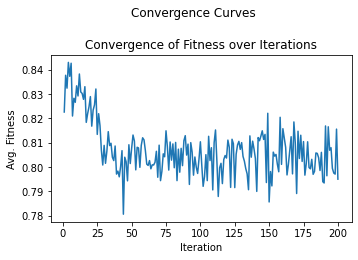

In [19]:
from Py_FS.wrapper.nature_inspired.PSO import PSO as pso
solution = pso(num_agents=30, max_iter=200, train_data=x, train_label=y, save_conv_graph=False)

In [20]:
solution.best_agent

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [21]:
pso_feature = []
for i,v in enumerate(solution.best_agent):
    if v == 1:
        pso_feature.append(x.columns[i])
pso_feature = set(pso_feature)
pso_feature

{'bu', 'sc', 'sod'}

In [22]:
solution.final_fitness

array([0.87239583, 0.8671875 , 0.86197917, 0.86197917, 0.83854167,
       0.83333333, 0.828125  , 0.828125  , 0.81770833, 0.81770833,
       0.80729167, 0.80729167, 0.8046875 , 0.796875  , 0.796875  ,
       0.79427083, 0.79427083, 0.78645833, 0.78125   , 0.77604167,
       0.7734375 , 0.7734375 , 0.76822917, 0.75520833, 0.74739583,
       0.74479167, 0.73958333, 0.73697917, 0.72395833, 0.71354167])

In [23]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=7, step=10, verbose=5)
rfe_selector.fit(x_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature = set(rfe_feature)

Fitting estimator with 24 features.
Fitting estimator with 14 features.
7 selected features


In [24]:
rfe_feature

{'al', 'bgr', 'bu', 'hemo', 'pcv', 'rc', 'sod'}

In [25]:
#From MRMr
selected_features

{'al', 'dm', 'hemo', 'htn', 'pc', 'pcv', 'sg'}

In [26]:
pso_feature

{'bu', 'sc', 'sod'}

In [27]:
pcr

{'al', 'dm', 'hemo', 'htn', 'pc', 'pcv', 'rc', 'sc', 'sg'}

In [28]:
#filter common features obtained through pso, rfe, mrmr using pearson
#mrmr and rfe selected top 10 features so find common and union with pso best features
(rfe_feature.union((selected_features).union(pso_feature)).union(pcr))

{'al', 'bgr', 'bu', 'dm', 'hemo', 'htn', 'pc', 'pcv', 'rc', 'sc', 'sg', 'sod'}

In [30]:
(rfe_feature.intersection((selected_features)).intersection(pcr))

{'al', 'hemo', 'pcv'}